# Strava Geographic Route Viewer

This notebook demonstrates how to:

- Decode a GPS route from a polyline string (from a csv already extracted from Strava)
- Compute cumulative distances
- Visualize the route on an interactive map
- Plot the elevation profile


In [1]:
# Import all the functions from the A4.py 
from A4 import decode_polyline, plot_route_map, plot_elevation_profile, interactive_dashboard

# install missing packages if needed
import pandas as pd
import polyline

## Import the data

In [2]:
# import and visualize the data
df =pd.read_csv( "nicole_strava.csv")

# Filter data by Rides
df = df[df.sport_type == 'Ride']
df

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,device_watts,kilojoules
4,2,Night Ride,11316.2,2907,50246,30.9,Ride,Ride,14842808101,2025-06-18T06:01:11Z,...,False,109915717,1,a14842808101,_|rbH}cznA{@_@g@My@Ia@@_AEuAVYNILM\IFO?WUOFKn@...,2,0.0,58.3,False,169.5
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,False,109915717,1,a14810343297,kdydHw~oeA|Dqa@XmTd`@aM`EmReQ}`@iAcm@kR}J~LkaA...,2,10.0,61.7,False,2310.4
7,2,Afternoon Ride,14387.4,3664,16494,106.2,Ride,Ride,14779160538,2025-06-12T13:16:19Z,...,False,109915717,1,a14779160538,szxbHsbsnAf@uAJo@Zo@vC_Kv@sDQgEYiLa@}Kc@qKsAkR...,2,NaN,63.0,False,231.0
8,2,Morning Ride,63252.6,13218,23829,433.6,Ride,Ride,14765932446,2025-06-11T07:12:21Z,...,False,109915717,1,a14765932446,_wxbHgkqnAlC@fScFjEeCzDuExJmWv@UQk@zC}V~H_`@rA...,2,10.0,64.5,False,852.3
11,2,Afternoon Ride - Green Route 🇪🇸,10387.0,2665,47587,36.1,Ride,Ride,14690965913,2025-06-03T15:54:56Z,...,False,109915717,1,a14690965913,{wmsF{jKQYMM}@sAEE[GGEi@eAGGIAGEOU_@o@AQOm@_Cc...,2,10.0,38.9,False,103.8
16,2,Morning Ride,33934.8,6497,10348,42.3,Ride,Ride,14638879314,2025-05-30T05:52:46Z,...,False,109915717,1,a14638879314,kvxbHkkqnAnBJn@[pHmA|By@bFyA`BcA`BuAbEqFCIJYtA...,2,10.0,56.8,False,369.1
17,2,Morning Ride,37751.4,8520,12693,135.5,Ride,Ride,14619100617,2025-05-28T07:05:01Z,...,False,109915717,1,a14619100617,wuxbHukqnAzIi@pKaD~EsClDuErBgEhBmEz@cDb@BxCwNz...,2,NaN,56.1,False,477.8
22,2,Lunch Ride,39978.1,8255,24090,261.6,Ride,Ride,14551916982,2025-05-21T09:34:43Z,...,False,109915717,1,a14551916982,exxbHgkqnAzCFp@SrIyAlH_CnBiAtAaAzCsD~BuEvBkFKC...,2,10.0,61.8,False,510.2
27,2,Lunch Ride - Innersbachklamm,102228.0,21805,29696,545.7,Ride,Ride,14480127482,2025-05-14T09:02:05Z,...,False,109915717,1,a14480127482,oaybHkcqnAvMdFfBnr@{CZrCh@LbIqE`X~OpMaHzGqPnz@...,2,10.0,55.9,False,1219.1
31,2,Afternoon Ride,25410.6,5436,12606,36.7,Ride,Ride,14438638297,2025-05-10T14:26:26Z,...,False,109915717,1,a14438638297,uuxbHmkqnAj@C`Ag@`@XjDa@dGyAvCeA`CiAtA}@jAkAvB...,2,10.0,50.0,False,271.5


## Select route of interest

In [3]:
df = df[df.name.str.contains("Munich", case=False, na=False)]
df

,resource_state,name,distance,moving_time,elapsed_time,total_elevation_gain,type,sport_type,id,start_date,...,has_kudoed,athlete.id,athlete.resource_state,map.id,map.summary_polyline,map.resource_state,workout_type,average_watts,device_watts,kilojoules
6,2,Munich to Salzburg 🇩🇪🇦🇹,180945.0,37425,168127,1119.6,Ride,Ride,14810343297,2025-06-13T17:06:04Z,...,False,109915717,1,a14810343297,kdydHw~oeA|Dqa@XmTd`@aM`EmReQ}`@iAcm@kR}J~LkaA...,2,10.0,61.7,False,2310.4


## Visualize the route on the map
Display the route spatially and the starting and ending point.

In [4]:
# Decode polyline

polyline_str  = df["map.summary_polyline"].iloc[0]
coords = polyline.decode(polyline_str)

# Display the route map
m = plot_route_map(coords)
m


## Retrieve elevation values by coordinate & create cross section
The elevation values are extracted from an API fetched by every point.

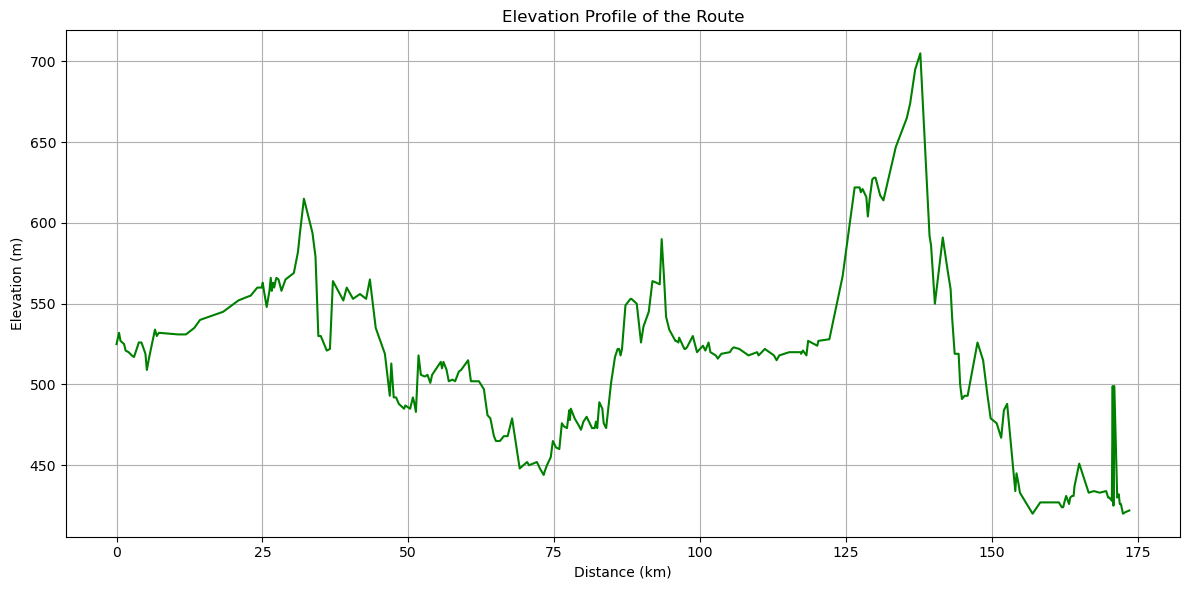

In [5]:
# Decode polyline
coords = decode_polyline(polyline_str)

# Generate elevation profile
plot_elevation_profile(coords)


## Generate interactive dashboard

Generate an interactive dashboard containing the two previous elements created, a map and a elevation profile.

In [6]:
interactive_dashboard(coords)